#CSE5DL Assignment

### Assignment due date: Tuesday 25/5/2021

Penalties are applied to late assignments (accepted up to 5 business days after the due date only). Five precent is deducted per business day late. A mark of zero will be assigned to assignments submitted more than 5 days late. 

<font color='red'> This is an individual assignment. You are not permitted to work as a part of a group when writing this assignment. </font>

### Assignment submission

Please zip all `*.ipynb`, `*.py`, `*.docx` and `*.xlsx` files into a single zip file and submit the zipped file via the link provided on LMS. 

### Copying, Plagiarism
Plagiarism is the submission of somebody else’s work in a manner that gives the impression that the work is your own. For individual assignments, plagiarism includes the case where two or more students work collaboratively on the assignment.  The Department of Computer Science and Information Technology treats plagiarism very seriously.  When it is detected, penalties are strictly imposed.




# Introduction

**DESCRIPTION:** In this assignment we have provided you with skeleton code. We have an image dataset and a text dataset, and you must train deep learning models for them. With the exception of Task 2b, all of the code required has already been shown to you in the labs.

In this assignment you will be required to write code and write short answer responses to questions in a structured report. You have been provided with a template Word document of this report in which you simply have to fill in the blanks.

Throughout this assignment, there are a few challenge questions worth bonus marks. Task 1 is worth 66 marks and Task 2 is worth 32 marks, totalling 98 marks possible before challenge questions. You can receive up to 10 marks from at most 3 challenge questions, so the maximum number of marks you can get is 108. However if you get over 100 marks the actual mark you will receive is 100% for the assignment assessment component of your grades.  Unless otherwise stated all marks quoted do not include challenge questions.

There are 71 marks associated with code and 27 marks associated with the report.

**INSTRUCTIONS:**

1.   Copy the skeleton files to your Google Drive.
2.   Edit `SKELETON_DIR` in the first cell to point to the skeleton files you uploaded in step 1. The provided code assumes you have uploaded them to "Uni/CSE5DL/Assignment" in your Google Drive.
3.   Run the following two cells


In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Set the working directory for the assignment
import os
SKELETON_DIR = '/content/drive/MyDrive/CSE5DL/Assignment_release'
os.chdir(SKELETON_DIR)
! mkdir -p "$SKELETON_DIR/saved_models"
! mkdir -p "$SKELETON_DIR/logs"

# Set up auto-reloading modules from the working directory
%load_ext autoreload
%autoreload 2

# Install extra dependencies
!pip install -q transformers==3.4.0
!pip install -q wandb==0.10.8

# Set the default figure size
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%%shell
DATA_URL='https://cloudstor.aarnet.edu.au/plus/s/00M4iLi0DYJzDsn/download'

pushd /content
wget $DATA_URL -O data.zip
unzip -q data.zip
popd

/content /content/drive/My Drive/CSE5DL/Assignment_release
--2021-05-25 01:08:30--  https://cloudstor.aarnet.edu.au/plus/s/00M4iLi0DYJzDsn/download
Resolving cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)... 202.158.207.20
Connecting to cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)|202.158.207.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1043211099 (995M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 994.88M  14.8MB/s    in 70s     

2021-05-25 01:09:41 (14.2 MB/s) - ‘data.zip’ saved [1043211099/1043211099]

replace data/txt/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: /content/drive/My Drive/CSE5DL/Assignment_release


# Task 1 - Image Classification

**MARKS**: 66

In this first task, you will create a deep learning model to classify images of skin lesions into one of seven classes: 

1.   "MEL" = Melanoma
2.   "NV" = Melanocytic nevus
3.   "BCC" = Basal cell carcinoma
4.   "AKIEC" = Actinic keratosis
5.   "BKL" = Benign keratosis
6.   "DF" = Dermatofibroma
7.   "VASC" = Vascular lesion

The data for this task is a subset of: https://challenge2018.isic-archive.com/task3/

The data for this task is inside the `/content/data/img` folder. It contains ~3,800 images named like `ISIC_000000.jpg` and the following label files:

*   `/content/data/img/train.csv`
*   `/content/data/img/val.csv`
*   `/content/data/img/train_small.csv`
*   `/content/data/img/val_small.csv`

The `small` versions are the first 200 lines of each partition and are included for debugging purposes. To save time, ensure your code runs on the `small` versions first.

## Task 1a. Explore the training set

**MARKS**: 5 (Code 3, Reports 2)

**INSTRUCTIONS**: Check for data issues, as we have done in the labs. Check the class distribution and at least 1 other potential data issue. Hint: Look in `explore.py` for a function that can plot the class distribution.

**REPORT**: What did you check for? What data issues are present in this dataset?

In [6]:
import pandas as pd

IMG_CLASS_NAMES = ["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"]

train_df = pd.read_csv('/content/data/img/train_small.csv')
val_df = pd.read_csv('/content/data/img/val_small.csv')
train_df.head(10)


,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ISIC_0024311,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,ISIC_0024312,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,ISIC_0024313,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ISIC_0024314,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,ISIC_0024315,1.0,0.0,0.0,0.0,0.0,0.0,0.0


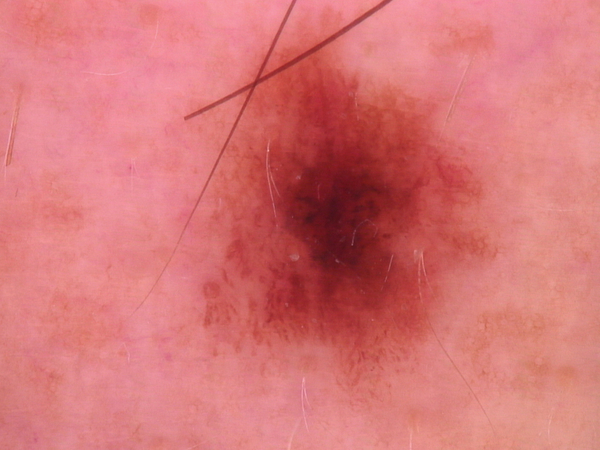

In [7]:
from PIL import Image
# Change the filename to view other examples from the dataset 
display(Image.open('/content/data/img/ISIC_0024306.jpg'))

In [8]:
# imports functions from the explore.py file
import explore
import numpy as np
# TODO - Check for data issues
# Hint: You can convert from one-hot to integers with argmax
#checking for Null values
print(train_df.isnull().sum().sum())
print(val_df.isnull().sum().sum())
#removing the duplicates 
train_df.drop_duplicates(subset ="image",keep = False, inplace = True)
val_df.drop_duplicates(subset ="image",keep = False, inplace = True)
train_df.head()
trainDropColoum = train_df.drop(['image'], axis=1)
validateDropColoum = val_df.drop(['image'],axis=1)

0
0


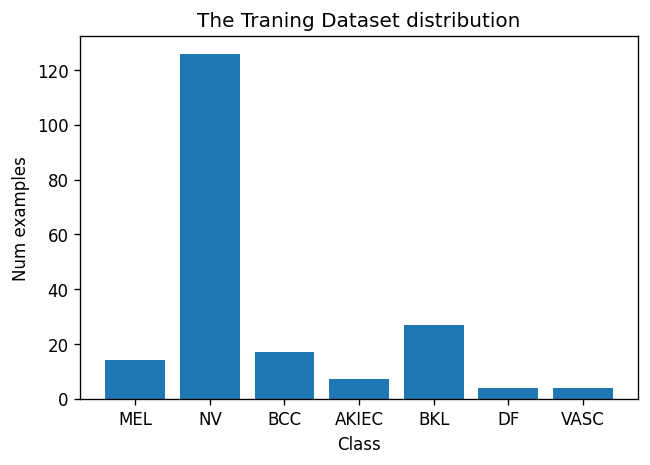

In [9]:
traindf= np.argmax(np.array(trainDropColoum), axis=1)
explore.plot_label_distribution(traindf,'The Traning Dataset',IMG_CLASS_NAMES)

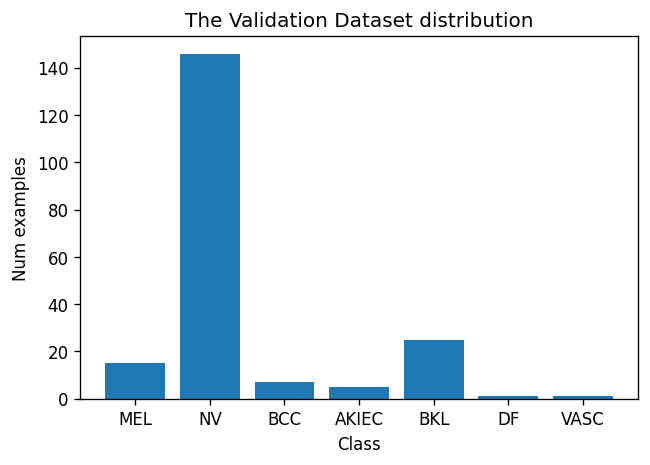

In [10]:
valDf= np.argmax(np.array(validateDropColoum), axis=1)

explore.plot_label_distribution(valDf,'The Validation Dataset',IMG_CLASS_NAMES)

In [11]:
#Distrubuting Class equally 
# train_df['DF'].value_counts()
import torch
import torch.nn as nn
BATCH_SIZE = 64
from torch.utils.data import DataLoader
counts = [ sum(traindf == c) for c in range(len(IMG_CLASS_NAMES)) ]
labelsLen = len(traindf)
weights = [c/labelsLen for c in counts]
weights = torch.tensor(weights)
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(traindf))
print(weights)


tensor([0.0704, 0.6332, 0.0854, 0.0352, 0.1357, 0.0201, 0.0201],
       dtype=torch.float64)


## Task 1b. Implement Training loop

**MARKS**: 17 (Code 15, Reports 2)

**INSTRUCTIONS**:

*   Implement LesionDataset in `datasets.py`. Use the cell below to test your implementation. 
*   Implement the incomplete functions in `train.py` marked as "Task 1b"
*   Go to the [Model Training Cell](#task-1-model-training) at the end of Task 1 and fill in the required code for "Task 1b".

**REPORT**: Why should you *not* use `random_split` in this case?

In [13]:
import datasets

trainds = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train_small.csv',augment=True)
valds = datasets.LesionDataset('/content/data/img',
                          '/content/data/img/val_small.csv',augment=False)
input, label = trainds[0]
print(input)
print(label)



tensor([[[0.5255, 0.5255, 0.5255,  ..., 0.5020, 0.4980, 0.5059],
         [0.5216, 0.5255, 0.5216,  ..., 0.5176, 0.5059, 0.5020],
         [0.5255, 0.5255, 0.5216,  ..., 0.5176, 0.5059, 0.4980],
         ...,
         [0.5059, 0.5098, 0.5098,  ..., 0.4745, 0.4706, 0.4627],
         [0.5216, 0.5255, 0.5176,  ..., 0.4706, 0.4627, 0.4549],
         [0.5176, 0.5255, 0.5098,  ..., 0.4627, 0.4627, 0.4549]],

        [[0.5255, 0.5255, 0.5255,  ..., 0.5020, 0.4980, 0.5059],
         [0.5216, 0.5255, 0.5216,  ..., 0.5176, 0.5059, 0.5020],
         [0.5255, 0.5255, 0.5216,  ..., 0.5176, 0.5059, 0.4980],
         ...,
         [0.5059, 0.5098, 0.5098,  ..., 0.4745, 0.4706, 0.4627],
         [0.5216, 0.5255, 0.5176,  ..., 0.4706, 0.4627, 0.4549],
         [0.5176, 0.5255, 0.5098,  ..., 0.4627, 0.4627, 0.4549]],

        [[0.5255, 0.5255, 0.5255,  ..., 0.5020, 0.4980, 0.5059],
         [0.5216, 0.5255, 0.5216,  ..., 0.5176, 0.5059, 0.5020],
         [0.5255, 0.5255, 0.5216,  ..., 0.5176, 0.5059, 0.

## Task 1c. Implement a baseline convolutional neural networks

**MARKS**: 17 (Code 12, Reports 5)

You will implement a baseline convolutional neural network which you can compare results to.

**INSTRUCTIONS**:

*   Implement a `SimpleBNConv` in `models.py` with:
    *   10 `nn.Conv2d` layers, with 8, 8, 16, 16, 32, 32, 64, 64, 128, 128 output channels respectively
    *   5 `nn.MaxPool2d` layers interspersed between just before every change in output channels, and
    *   `nn.BatchNorm2d`, and
    *   `nn.ReLU()` for the activation function
*   Use a normalised confusion matrix on the model's validation predictions (marked "Task 1c" in `train.py`).
*  Go to the [Model Training Cell](#task-1-model-training) at the end of Task 1 and fill in the required code to train the model.

Training should take about 2-3 minutes/epoch. Validation accuracy should be 60-70%, but UAR should be around 20-40%.

**REPORT**: As training sets get larger, the length of time per epoch also gets larger. Some datasets take over an hour per epoch. This makes it impractical to debug typos in your code since it can take hours after starting for the program to reach new code. Name two ways to significantly reduce how long each epoch takes - for debugging purposes - while still using real data and training a network. 

**REPORT**: Show the confusion matrix and plots of the validation accuracy and UAR in your report, and explain what is going wrong. 
(Right-click a plot and select "save image as..." to save the image to your computer)

## Task 1d. Account for data issues

**MARKS**: 6 (Code 3, Reports 3)

**INSTRUCTIONS**: Account for the data issues in Task 1a and retrain your model.

**REPORT**: How did you account for the data issues? Was it effective? How can you tell? Show another confusion matrix.

**IMPORTANT NOTE**: One of the techniques from the lab will cause a warning in the metric calculation on `train_small.csv`, but will work fine on `train.csv`.

## Task 1e. Data Augmentation

**MARKS**: 6 (Code 3, Reports 3)

**INSTRUCTIONS**: 

*   Add an `augment` flag to LesionDataset which specifies whether any augmentation is done to the images. Ensure it is set to `True` *only* for the training dataset.
*   Use random horizontal flips
*   Use at least 2 other different non-deterministic augmentations

**REPORT:** Are random vertical flips appropriate for this dataset? Why?

Using data augmentation does not guarantee improved model performance. Data augmentation can hurt test performance by making the model train on unrealistic images.

**REPORT**: What effect did Data Augmentation have on performance? Show a screenshot of the relevant graphs from Weights & Biases for evidence.

**CHALLENGE**: (3 marks) Apply 5 crop augmentation with crop size 200x300. Make a distinct model which uses 5 crops at once to give a single answer. Include in your report how you did this and report the effect on performance.

## Task 1f. Chase improved performance

**MARKS**: 15 (Code and reports not separable for this task)

**INSTRUCTIONS**: 
*   Create a model from a pre-trained model from the torchvision model zoo. We recommend Resnet18, but you may use any model you like. You may freeze all the weights except the last, or fine-tune all the weights. https://cloudstor.aarnet.edu.au/plus/s/TsYJXyJWch0h7TD
*   Create your own models, modifying the model architecture, try different losses, learning rates. Change anything you like except the evaluation metrics in search of a better model.

Train at least 10 different models, each with a different combination.

**REPORT**: Create a table in an excel spreadsheet that is similar to that used in Lab 3 to record your results. Make sure it includes every parameter of variation between your combinations as a separate column. Include notes about what you were thinking/hoping for each combination as a number column in the spreadsheet.

In addition to the excel spreadsheet generate a report using Weights and Biases of the models you trained and the performance curves. Save the report as a pdf and include this in your submission. Please see this link on how to generate reports with Weights and Biases. https://docs.wandb.ai/guides/reports

Play around with Weights and Biases to see what cool features you can dig out and use to better visualize the training results and use that to improve the information shared via the report. 

Write a discussion about the key findings from the experimental results.

**CHALLENGE REPORT**: (3 marks) Assuming you use the full dataset in a single epoch, if you halve the size of the batch size, what happens to the number of times that you update the weights per epoch? With reference to the gradients, under what circumstances is this good?

<a name="task-1-model-training"></a>
## Model Training Cell

Note we will be using Weights and Biases to keep track of our experimental runs and evaluation metrics. This is similar to lab 6. Please see instructions in lab 6 to learn how to use Weights and Biases. 


In [16]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
print("Training on", device)
import datasets
import models
import train

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 20

# Create datasets/loaders
# TODO Task 1b - Create the data loaders from LesionDatasets
# TODO Task 1d - Account for data issues, if applicable
# train_dataset = ...
# val_dataset = ...
# train_loader = ...
# val_loader = ...
train_dataset = trainds
val_dataset = valds
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

train_loader_1 = DataLoader(train_dataset, batch_size=BATCH_SIZE,sampler=sampler)

# Instantiate model, optimizer and criterion
# TODO Task 1c - Make an instance of your mod





#model = model_ft.to(device)
model = models.Mymodel(device)
# TODO Task 1d - Account for data issues, if applicable
# model = models.<**put the name of the model class you created in the model file here**>
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train model
# TODO Task 1c: Set to ident_str to a string that identifies this particular
#               training run. Note this line in the training code
#                     exp_name = f"{model.__class__.__name__}_{ident_str}"
#               So it means the the model class name is already included in the
#               exp_name string. You can consider adding other information particular
#               to this training run, e.g. learning rate (lr) used, 
#               augmentation (aug) used or not, etc.


train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name = "CSE5DL Assignment Task 1",
                  ident_str= "Smapler Data Set")

Training on cpu
Problem at: /content/drive/My Drive/CSE5DL/Assignment_release/train.py 157 train_model


KeyboardInterrupt: ignored

# Task 2 - News headline classification

**MARKS**: 32

You will first create your own model for classifying headlines as one of:

*   World
*   Sport
*   Business
*   Sci/Tech

You will then compare it to a pre-trained DistilBERT model that has been fine-tuned similar to Lab 6. Note: using a model pre-trained on a source task for a new target task is called "transfer learning" whether you fine-tune it or not.

The data for this task is a subset of: https://github.com/mhjabreel/CharCnn_Keras/tree/master/data/ag_news_csv

## Task 2a. Exploring the dataset

**MARKS**: 3 (Code 2, Reports 1)

**INSTRUCTIONS**: Check for any data issues discussed in the labs.

**REPORT**: What did you check for? What data issues exist, if any? Report anything you checked even if it turned out the data did not have that issue. We want to know what you are checking.

In [17]:
import pandas as pd

with open('/content/data/txt/classes.txt') as f:
    TXT_CLASS_NAMES = [line.rstrip('\n') for line in f]

train_df = pd.read_csv('/content/data/txt/train_small.csv', header=None)
val_df = pd.read_csv('/content/data/txt/val_small.csv', header=None)
train_df.head(10)

,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
5,3,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...
6,3,Money Funds Fell in Latest Week (AP),AP - Assets of the nation's retail money marke...
7,3,Fed minutes show dissent over inflation (USATO...,USATODAY.com - Retail sales bounced back a bit...
8,3,Safety Net (Forbes.com),Forbes.com - After earning a PH.D. in Sociolog...
9,3,Wall St. Bears Claw Back Into the Black,"NEW YORK (Reuters) - Short-sellers, Wall Stre..."


['World', 'Sports', 'Business', 'Sci/Tech']


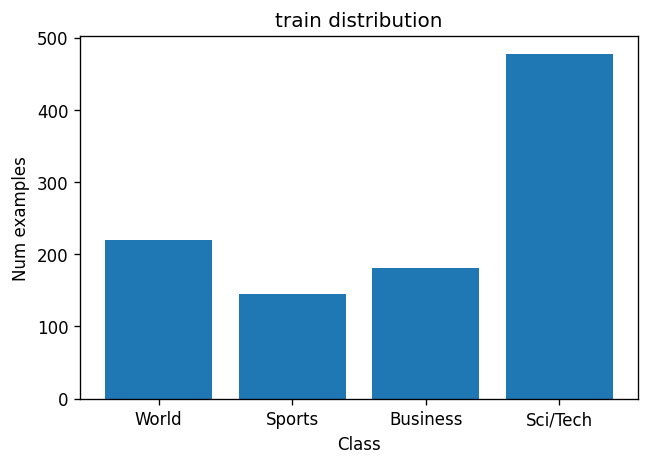

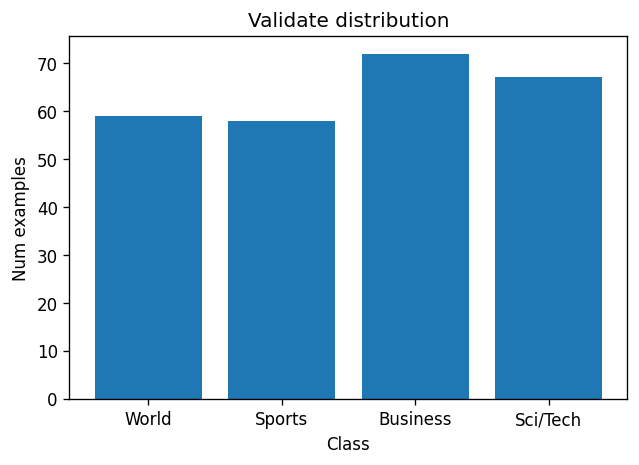

In [18]:
import explore
import numpy as np

train_df.shape
# TODO - Check for data issues
print(TXT_CLASS_NAMES)
# Pull out the labels

Train_COLUMNS = train_df[0]-1
Valid_COLUMNS = val_df[0]-1
# Plot class distribution from the labels
explore.plot_label_distribution(Train_COLUMNS,'train',TXT_CLASS_NAMES)
explore.plot_label_distribution(Valid_COLUMNS,'Validate',TXT_CLASS_NAMES)
# Check for other data issues


## Task 2b. Clustering and visualising embeddings from a pre-trained model

**MARKS**: 14 (Code 11, Reports 3)

**INSTRUCTIONS**: 

*  Implement the `TextDataset` class in the `datasets.py` file. Consider adding a small code block to test your implementation, as provided in task 1b.

*   Complete `visualise_embeddings.py` and run it. This will:
    *   visualise embeddings of the headlines from a pre-trained `'distilbert-base-uncased'` model (i.e. not yet fine-tuned on the labels) using a combination of PCA and T-SNE. T-SNE is a popular dimensionality reduction method that takes data from a high dimensional space and reduces it to just two dimensions while trying to preserve the right distances between points. We first use PCA to reduce the dimensionality of the embedding to 50 dimensions and then use T-SNE to reduce the embedding from 50 dimensions to 2. This is because T-SNE works best when the input dimensionality is only moderately high (50 or less dimensions). The visualization will label each article represented by a point with a color corresponding to their true label. Ideally the colors are well separated into separate clusters. If this happens it will be really cool since it means we did not even need to fine-tune the model on our data, it is already able to separate the classes.
    *   Next the code will run K-Means clustering on the validation set to group the data into separate clusters. The code will then colour the points based on which cluster they belong to rather than the ground truth label. 


**REPORT**: By looking at the resulting images, which two classes have the most similar embeddings? How can you tell? Did you expect this, if so, why, if not why not?

**CHALLENGE**: (8 marks) Only attempt this after completing the rest of Task 2.

*   Modify `visualise_embeddings.py` so that it can load the weights for a fine-tuned DistilBERT model. Then visualize the data points with their corresponding true labels. 
*   Next instead of using K-Means for the second visualisation, use the model's own predicted labels to colour the points.

Present the resulting image in your report.

In [19]:
import datasets

traintxt = datasets.TextDataset('/content/data/txt/train_small.csv',80)
valtxt = datasets.TextDataset('/content/data/txt/val_small.csv',80)
inputs,labels= traintxt[1]
print(inputs,labels)


tensor([  101, 26665,  1011,  2797,  5211,  3813, 18431,  2571,  2177,  1010,
         1032,  2029,  2038,  1037,  5891,  2005,  5003,  3211,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0]) tensor(2)


[autoreload of models failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/content/drive/My Drive/CSE5DL/Assignment_release/models.py", line 125
    return self.out(x)
    ^
IndentationError: unexpected indent
]


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi


Reducing dimensionality of embeddings...


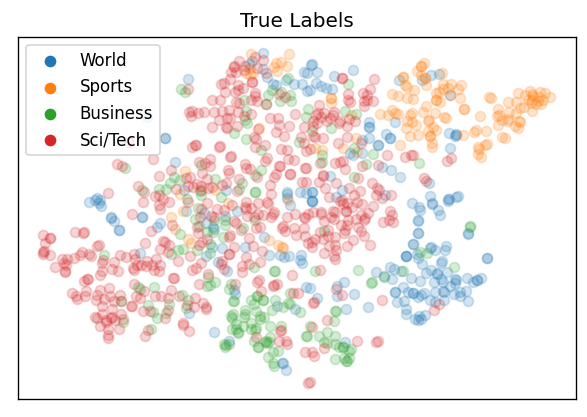

Fitting kmeans...


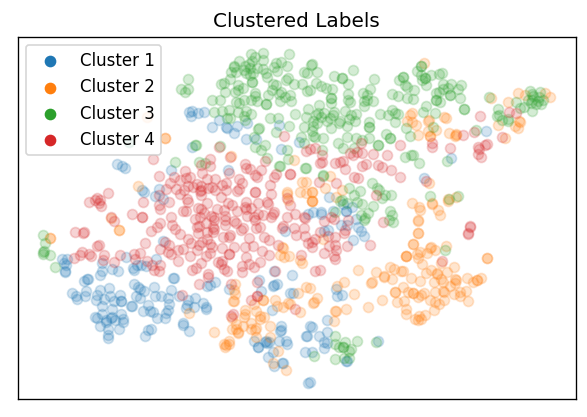

In [24]:
import visualise_embeddings
SENTENCE_LEN = 80
visualise_embeddings.mk_plots(SENTENCE_LEN)

`## Task 2c. Models

**MARKS**: 10 (Code 7, Reports 3)

**INSTRUCTIONS**:

*   Complete `TextMLP` in `models.py`. It should be a simple MLP with 8 Linear layers. It should first embed the inputs into a vocabulary of size 30522. Use an output feature size of 256 in all hidden layers and a feature size of 128 for the embeddings. Flatten the sentence after embedding, but before it goes into any Linear layers. Use batch norm and ReLU. Train for 1000 epochs with learning rate of 0.001 and a batch size of 512.
*   Complete `DistilBertForClassification` in `models.py`. This model should replace the last layer with an `nn.Linear` with 4 outputs for classification. Hint: Call `print()` on the DistilBERT model to observe the layers and their names before attempting this. Train for 4 epochs with learning rate of 0.001 and a batch size of 64.

Each of these should take around 10 minutes to complete.

Go to the [Model Training Cell](#task-2-model-training) at the end of Task 2 and fill in the required code to train the model.

**REPORT**: The saved model weights of a fine-tuned DistilBERT model are >200MB, but you only created one small `nn.Linear` layer. Why is the saved model so large? 

**REPORT**: These models should accept only input with a dtype of `torch.int64`. What do each of these longs (`int64`) represent?

## Task 2d. Learning Rate

**MARKS**: 5 (Code 0, Reports 5)

Fine-tuning `DistilBertForSequenceClassification` with Adam at a learning rate of 0.001 results in very poor accuracy (~26%).

**INSTRUCTIONS**: 

*   Uncomment the lines marked `Task 2d` in `train.py`
*   Execute the below cell to begin training and observe the class distribution per epoch
*   Comment the lines marked `Task 2d` in `train.py` so they no longer interfere with the training.


**REPORT**: What is wrong with the class distributions? The learning rate can be changed to fix it. Should you increase or decrease the learning rate? How can you tell?

**REPORT**: After fixing the learning rate, comment on the relative train/val performance between these two models. Which model performed better on each partition? Is this expected? If so, why?

When you have finished Task 2d. Go back to Task 2b and finish the challenge if you are up to it. You should get a pleasant surprise if you have done everything correctly.


<a name="task-2-model-training"></a>
## Model Training Cell

In [28]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import datasets
import models
import train
device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
print("Training on", device)
torch.manual_seed(42)

SENTENCE_LEN = 80
NUM_EPOCHS = 4
BATCH_SIZE = 64

# Create datasets/loaders
# TODO: Create the data loaders from TextDatasets
# train_loader = ...
# val_loader = ...
train_loader = datasets.TextDataset('/content/data/txt/train_small.csv',SENTENCE_LEN)
val_loader = datasets.TextDataset('/content/data/txt/val_small.csv',SENTENCE_LEN)
# Instantiate model, optimizer and criterion
# TODO: Make an instance of your model
# model = models.<**put the name of the model class you created in the model file here**>
model = models.TextMLP(30522,SENTENCE_LEN,256)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# TODO Change ident_str to something identifying this experiment e.g. lr0001
# We are using the same train model function we wrote for task 1.
train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  TXT_CLASS_NAMES, NUM_EPOCHS, project_name = "CSE5DL Assignment Task 1",
                  ident_str='**fill me in**')

Training on cpu


wandb: wandb version 0.10.30 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


NotImplementedError: ignored

# Super challenge tasks

These challenge tasks are quite difficult and will really test your mastery of PyTorch and `nn.Linear` layers.

## Super challenge 1. Manually assigning weights

**MARKS**: 5

We can manually assign weights to an `nn.Linear` like this:



In [ ]:
import torch
import torch.nn as nn
lin = nn.Linear(10, 20)
manual_weights = torch.arange(20*10).reshape(lin.weight.shape)
lin.weight.data[:] = manual_weights
lin.bias.data[:] = 0

But this does not calculate anything useful. A Linear layer simply performs a weighted sum (plus bias). We can choose weights/biases to perform known operations.

**INSTRUCTIONS**: 
1.   Given an `nn.Linear(1, 1)` layer, set the weights such that the layer adds 1 to it's input.
2.   Given an `nn.Linear(1, 1)` layer, set the weights such that the layer calculates `y = 3x + 2`.
3.   Given an `nn.Linear(4, 1)` layer, set the weights such that the layer calculates the average of it's inputs.
4.   Given an `nn.Linear(4, 2)` layer, set the weights such that the layer calculates both the average of it's inputs and the sum of the inputs.
5.   Given an `nn.Linear(3, 3)` layer, set the weights such that the layer returns the inputs, but in reverse order.
6.   Given an `nn.Linear(5, 2)` layer, set the weights such that the layer always returns `(4,2)`


Note: We would never use this in a deep learning model; this challenge is to prove that you understand the mathematics and coding mechanics of the `nn.Linear` layer.

In [ ]:
import sc1
sc1.test_1(sc1.modify_lin_1)
sc1.test_2(sc1.modify_lin_2)
sc1.test_3(sc1.modify_lin_3)
sc1.test_4(sc1.modify_lin_4)
sc1.test_5(sc1.modify_lin_5)
sc1.test_6(sc1.modify_lin_6)

## Super challenge 2. Convert to fully convolutional

**MARKS**: 5

**This question is very difficult to understand, however the solution is very short and powerful**

Take an image from the dataset, upsample it to 2x it's size, load a model you trained from Task 1 and try to run it on the upsampled image. It will crash at the `nn.Linear` because the input image size is different to that which it was trained on.

A model is "fully convolutional" if it uses only locally connected layers: e.g. `nn.Conv2d`, `nn.MaxPool2d`; i.e. no `nn.Linear`. This allows them to operate on any size input image. Where possible, we should use fully convolutional networks to increase portability of our models. But what if we've already created trained a model using a fully connected layer? Are we stuck having to train a new model?

In the Overfeat paper (https://arxiv.org/abs/1312.6229) they describe a method to convert a model with a fully connected layer at the end into a fully convolutional model without re-training anything. We will describe the method here. Feel free to try reading the paper but don't be discouraged if it makes no sense; it's a complicated paper with many ideas presented in a less-than-clear way.

We will ignore the bias for now. Consider the calculation a `nn.Linear` layer is doing. It's a map from `m` features to `n` features, where each output feature is a linear combination of each of the inputs. Thus there are `m` x `n` weights in a `nn.Linear` layer (not including bias).

Now consider a convolution layer with a kernel size the same size as the input image. Let the number of input pixels total `m`, input channels be `1` and the number of output channels be `n`. Then, such a convolution layer is performing the same mapping as the `nn.Linear` layer.

So, to convert an `nn.Linear` to an `nn.Conv2d` it is a matter of copying the weights from the former to the latter such that they calculate the same thing. Similarly for the bias.

**Instructions**:
*   Complete the below code to convert an arbitrary `nn.Linear` to an `nn.Conv2d` which calculates the same thing
*   Take an image from the training set:
    *   Upsample it to 2x it's size
    *   Run the model on it, to get a heatmap per class
    *   Visualise those heatmaps




In [ ]:
from PIL import Image
import torch.nn as nn
import torchvision.transforms as transforms

import models


NEW_WIDTH = 1200
img = Image.open('/content/data/img/ISIC_0024306.jpg')
largify = transforms.Resize(NEW_WIDTH)
to_tensor = transforms.ToTensor()
img_sm = to_tensor(img)[None, :]
img_lg = to_tensor(largify(img))[None, :]

# TODO - Load your model


# Check outputs before modification
result1 = model(img_sm)
print(torch.flatten(result1).tolist())
# This next line will crash because of the linear layer
# result2 = model(img_lg)
# print(result2)


# TODO - Replace the Linear layer with a Conv Layer that has equivalent weights


# Ensure that it still gives the same result
result3 = model(img_sm)
print(torch.flatten(result3).tolist())
result4 = model(img_lg)
print(result4.shape)

assert torch.allclose(torch.flatten(result1), torch.flatten(result1))